## Markov Chain Analysis of Weather-Dependent Company Income

In [2]:
import pandas as pd
import numpy as np

# Define transition matrix P
P = np.array([
    [0.3, 0.5, 0.2],
    [0.1, 0.3, 0.6],
    [0.2, 0.4, 0.4]
])
states = ["Good (G)", "Fair (F)", "Poor (P)"]

# Create a DataFrame for better visualization of the transition matrix
P_df = pd.DataFrame(P, columns=states, index=states)

# Define cost vector c (negative for profit, positive for loss)
c = np.array([-2, -1, 3])

# Discount factor
alpha = 0.8

# Identity matrix
I = np.eye(len(P))

# Compute (I - alpha * P)
A = I - alpha * P

# Compute the expected present value vector t
t = np.linalg.inv(A) @ c

# Create a DataFrame for expected present value results
results_df = pd.DataFrame({
    "State": states,
    "Expected Present Value of Total Income (in millions)": t
})

# Display the results
print("Transition Matrix (P):")
print(P_df)
print("\nExpected Present Value of Total Income:")
print(results_df)

Transition Matrix (P):
          Good (G)  Fair (F)  Poor (P)
Good (G)       0.3       0.5       0.2
Fair (F)       0.1       0.3       0.6
Poor (P)       0.2       0.4       0.4

Expected Present Value of Total Income:
      State  Expected Present Value of Total Income (in millions)
0  Good (G)                                             -0.544   
1  Fair (F)                                              1.896   
2  Poor (P)                                              5.176   


## Graph Visualization

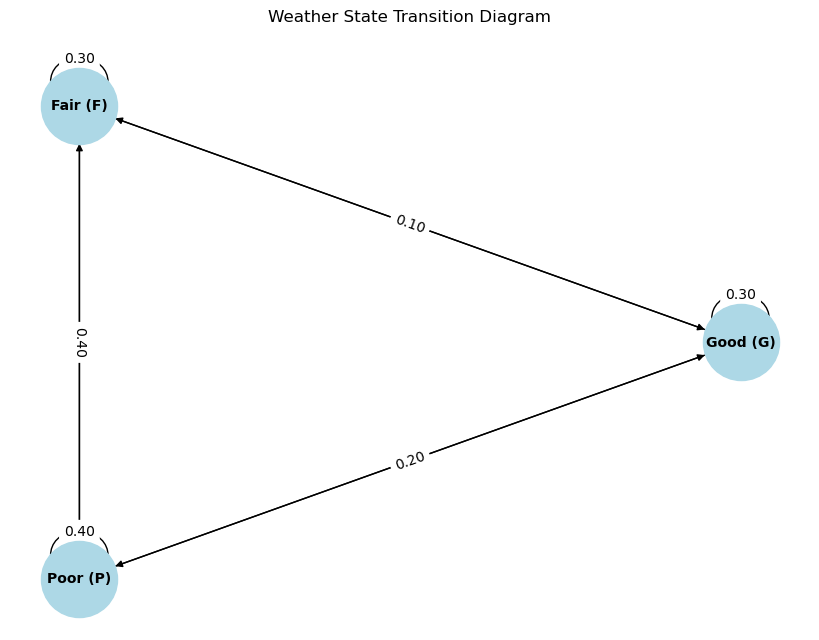

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges with transition probabilities
for i, from_state in enumerate(states):
    for j, to_state in enumerate(states):
        prob = P[i, j]
        if prob > 0:
            G.add_edge(from_state, to_state, weight=prob)

# Position nodes in a circular layout
pos = nx.circular_layout(G)

# Draw graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue',
        font_size=10, font_weight='bold', arrows=True)
edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Weather State Transition Diagram")
plt.show()